# 👥 HR Analytics Portfolio Project

This notebook demonstrates SQL and Python-based analysis of HR data, including employee demographics, performance, training, and attrition.

In [13]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("hr_analytics_portfolio.sqlite")

# Example query
query = "SELECT * FROM Employees"
df = pd.read_sql_query(query, conn)
df.head()



,employee_id,first_name,last_name,gender,department,hire_date,salary,performance_rating
0,1,Alice,Johnson,F,Finance,2020-01-15,75000.0,4
1,2,Bob,Smith,M,IT,2019-03-22,82000.0,5
2,3,Carmen,Lee,F,HR,2021-07-01,65000.0,3
3,4,David,Kim,M,Marketing,2018-06-11,70000.0,4
4,5,Ella,Brown,F,IT,2022-02-01,72000.0,4


In [10]:
query = '''
SELECT department, COUNT(*) AS total_employees
FROM Employees
GROUP BY department;
'''
pd.read_sql_query(query, conn)


,department,total_employees
0,Finance,1
1,HR,1
2,IT,2
3,Marketing,1


In [11]:
query = '''
SELECT department, AVG(salary) AS avg_salary
FROM Employees
GROUP BY department;
'''
pd.read_sql_query(query, conn)


,department,avg_salary
0,Finance,75000.0
1,HR,65000.0
2,IT,77000.0
3,Marketing,70000.0


In [12]:
query = '''
SELECT first_name || ' ' || last_name AS employee_name, department, performance_rating
FROM Employees
WHERE performance_rating >= 4;
'''
pd.read_sql_query(query, conn)


,employee_name,department,performance_rating
0,Alice Johnson,Finance,4
1,Bob Smith,IT,5
2,David Kim,Marketing,4
3,Ella Brown,IT,4


In [14]:
import pandas as pd
import sqlite3

# Connect to your database
conn = sqlite3.connect("hr_analytics_portfolio.sqlite")

# Run the query
query = '''
SELECT reason, COUNT(*) AS total_exits
FROM Exits
GROUP BY reason;
'''
pd.read_sql_query(query, conn)



,reason,total_exits
0,Career Change,1


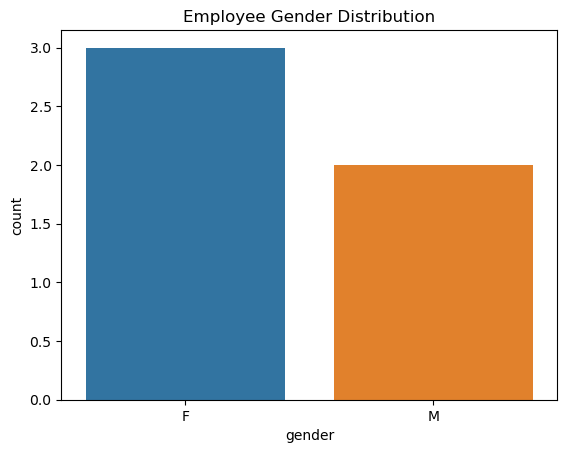

In [19]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to your SQLite DB
conn = sqlite3.connect("hr_analytics_portfolio.sqlite")

# Run SQL query
query = 'SELECT gender, COUNT(*) AS count FROM Employees GROUP BY gender;'
df_gender = pd.read_sql_query(query, conn)

# Create bar plot
sns.barplot(data=df_gender, x='gender', y='count')
plt.title('Employee Gender Distribution')
plt.show()
